# Diabetic Prediction Model

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

***Importing Dataset***

In [54]:
data = pd.read_csv("D:/MSDS/Projects/Diabetic Prediction/diabetes.csv")

In [56]:
data

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


***Checking For Null Values***

In [59]:
data.isnull().sum()

preg            0
glucose         0
bp_diastolic    0
skin_triceps    0
insulin         0
bmi             0
pedigree        0
age             0
label           0
dtype: int64

***Outliers Analysis***

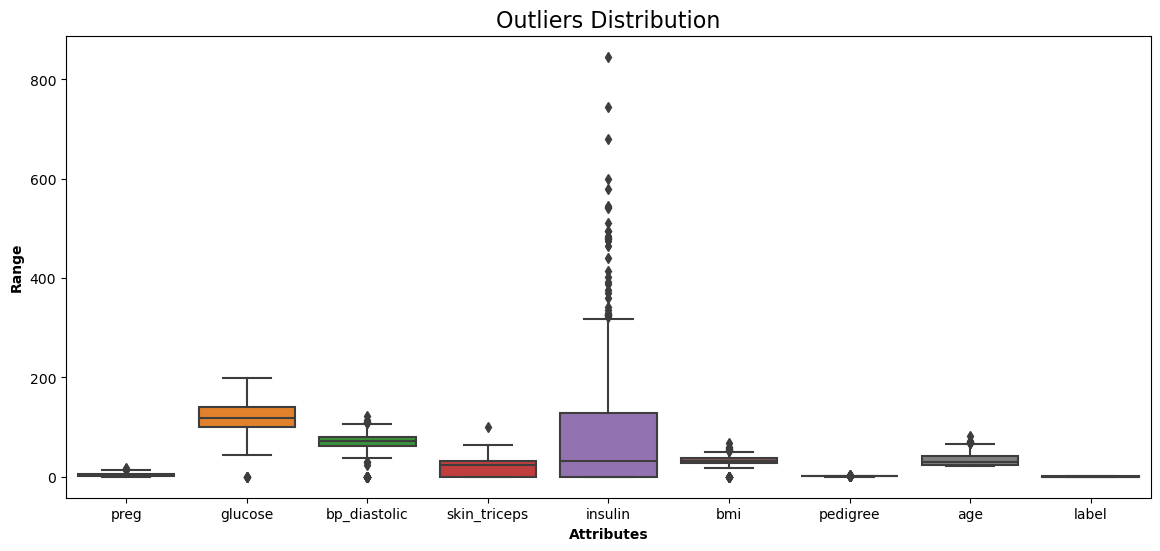

In [62]:
def show_boxplot(data):
    plt.rcParams['figure.figsize']=[14,6]
    sns.boxplot(data, orient = "v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
show_boxplot(data)

***Removing Outliers***

In [91]:
def remove_outliers(data):

    # Create a copy of the DataFrame to avoid modifying the original
    df = data.copy()

    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=["number"]).columns

    for col in numeric_columns:
    # Calculate the IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the DataFrame to keep rows within bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

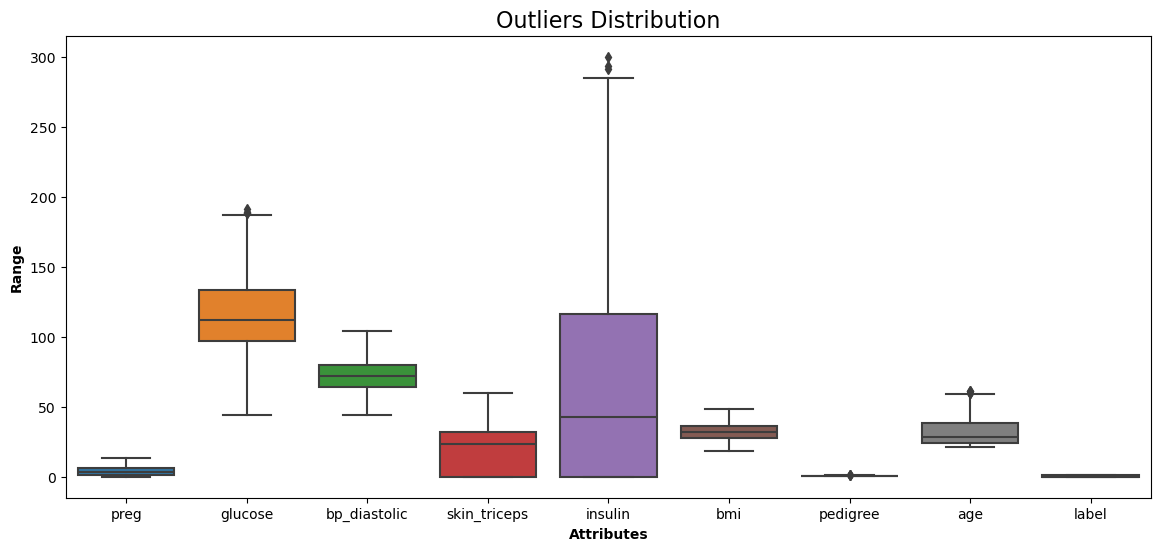

In [95]:
show_boxplot(remove_outliers(df))

## EDA

In [97]:
df.describe()

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,3.786164,118.869497,72.007862,20.745283,69.017296,31.964151,0.426237,32.555031,0.309748
std,3.251388,28.996773,11.301102,15.231688,83.601857,6.384132,0.245088,10.879807,0.462754
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.238750,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,42.500000,32.000000,0.361000,29.000000,0.000000
75%,6.000000,136.250000,80.000000,32.000000,122.000000,36.000000,0.583000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,330.000000,49.600000,1.162000,65.000000,1.000000


In [102]:
df.corr()

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
preg,1.000000,0.130759,0.206581,-0.088675,-0.090608,0.037389,-0.013274,0.582318,0.235631
glucose,0.130759,1.000000,0.227750,0.017161,0.280328,0.193989,0.051546,0.268977,0.493355
bp_diastolic,0.206581,0.227750,1.000000,0.039799,-0.019897,0.290307,0.022308,0.345872,0.171178
skin_triceps,-0.088675,0.017161,0.039799,1.000000,0.475258,0.383783,0.165758,-0.122427,0.042490
insulin,-0.090608,0.280328,-0.019897,0.475258,1.000000,0.177380,0.225171,-0.053711,0.114653
bmi,0.037389,0.193989,0.290307,0.383783,0.177380,1.000000,0.148256,0.066110,0.268268
pedigree,-0.013274,0.051546,0.022308,0.165758,0.225171,0.148256,1.000000,0.031168,0.168112
age,0.582318,0.268977,0.345872,-0.122427,-0.053711,0.066110,0.031168,1.000000,0.267017
label,0.235631,0.493355,0.171178,0.042490,0.114653,0.268268,0.168112,0.267017,1.000000


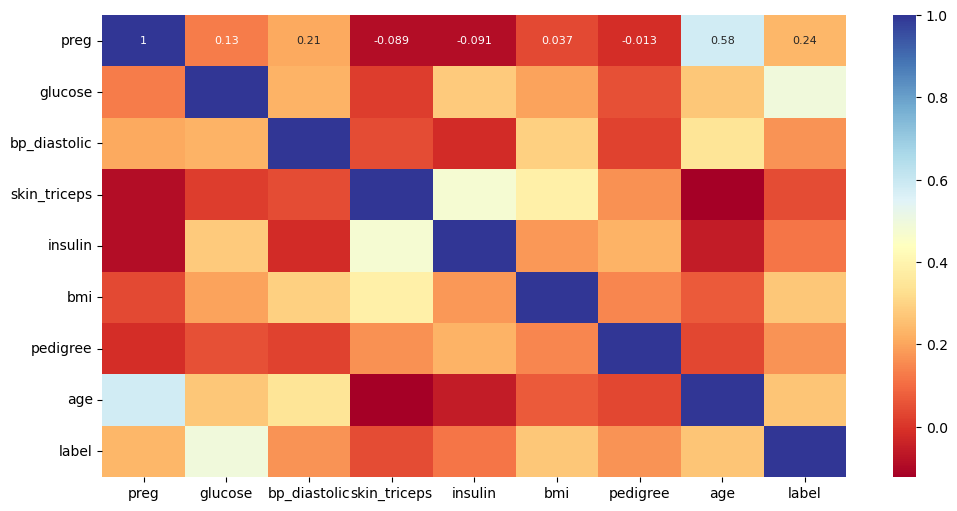

In [116]:
#Get the Correlation of Fatatures in the Dataset
corrmap = df.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(12,6))
#plot Heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlBu",annot_kws={"fontsize":8});

In [106]:
#check label value count 
df.label.value_counts()

label
0    439
1    197
Name: count, dtype: int64

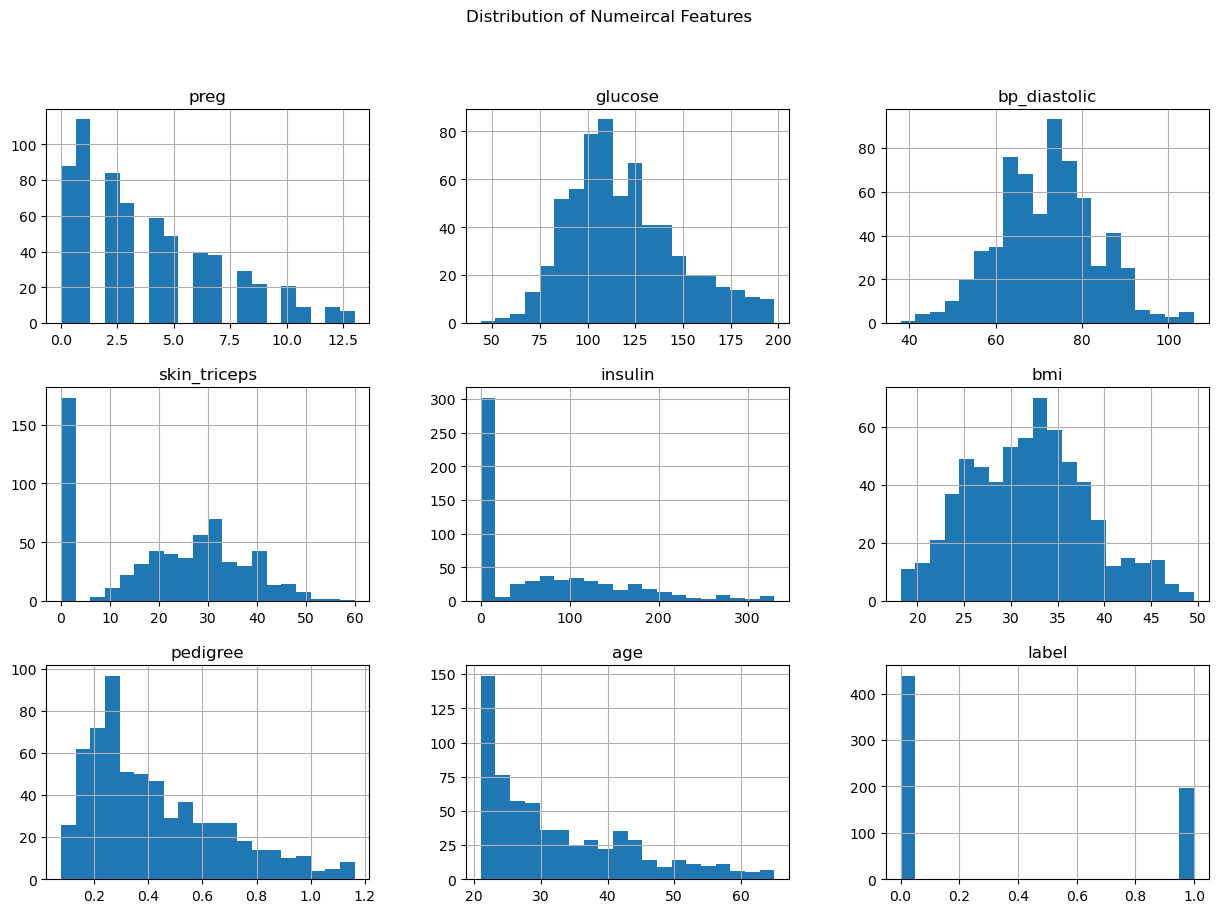

In [108]:
df.hist(bins=20, figsize=(15,10))
plt.suptitle('Distribution of Numeircal Features')
plt.show()

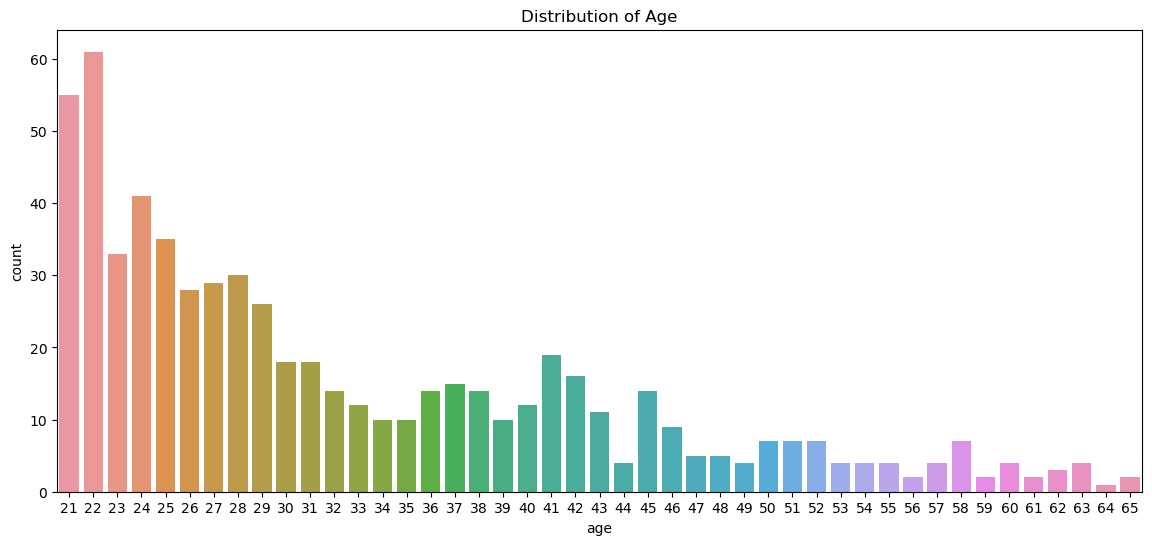

In [132]:
# Distribution of categorical features
sns.countplot(x='age', data=df)
plt.title('Distribution of Age')
plt.show()

C:\Intel\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Intel\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Intel\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Intel\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

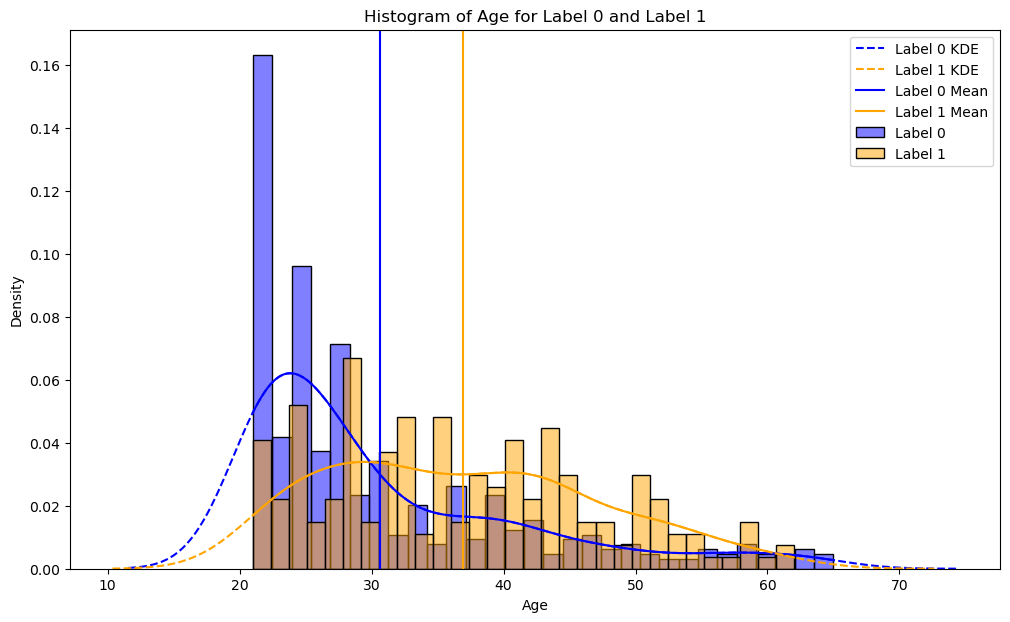

In [136]:
# Create separate DataFrames for label 0 and label 1
label_0_data = df[df['label'] == 0]
label_1_data = df[df['label'] == 1]

# Plot histograms for age
plt.figure(figsize=(12, 7))

# Histogram with transparency and density normalization
sns.histplot(label_0_data['age'], bins=30, kde=True, label='Label 0', color='blue', alpha=0.5, stat='density')
sns.histplot(label_1_data['age'], bins=30, kde=True, label='Label 1', color='orange', alpha=0.5, stat='density')

# Overlay KDE lines for better visualization
sns.kdeplot(label_0_data['age'], label='Label 0 KDE', color='blue', linestyle='--')
sns.kdeplot(label_1_data['age'], label='Label 1 KDE', color='orange', linestyle='--')

# Overlay mean values with vertical lines
plt.axvline(label_0_data['age'].mean(), color='blue', linestyle='-', label='Label 0 Mean')
plt.axvline(label_1_data['age'].mean(), color='orange', linestyle='-', label='Label 1 Mean')

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram of Age for Label 0 and Label 1')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [138]:
cols = list(df.columns)
cols

['preg',
 'glucose',
 'bp_diastolic',
 'skin_triceps',
 'insulin',
 'bmi',
 'pedigree',
 'age',
 'label']

In [140]:
features_cols=['preg','glucose','bp_diastolic','skin_triceps','insulin','bmi','pedigree','age']
print(features_cols)

['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age']


## Train Test Split

In [151]:
# Library Call fro Train Test Split

from sklearn.model_selection import train_test_split

In [153]:
# Data Frame for X and Y
#Features
x = df[features_cols]
y = df.label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30) 


In [155]:
#Checking the number of 0's in Training portion of the Dataset:
print("[Y_Train] Total No of [0] in dataset: ", len(y_train[y_train==0]))

#Checking the number of 1's in Training portion of the Dataset:
print("[Y_train] Total no of [1] in dataset: ", len(y_train[y_train==1]))


[Y_Train] Total No of [0] in dataset:  354
[Y_train] Total no of [1] in dataset:  154


In [157]:
#Checking the number of 0's in Testing portion of the Dataset:
print("[Y_Test] Total no of [0] in dataset : ", len(y_test[y_test==0]))

#Checking the number of 1's in Testing portion of the Dataset:
print("[Y_Test] Total No of [1] in dataset : ", len(y_test[y_test==1]))

[Y_Test] Total no of [0] in dataset :  85
[Y_Test] Total No of [1] in dataset :  43


## Training-Testing Value Counts:

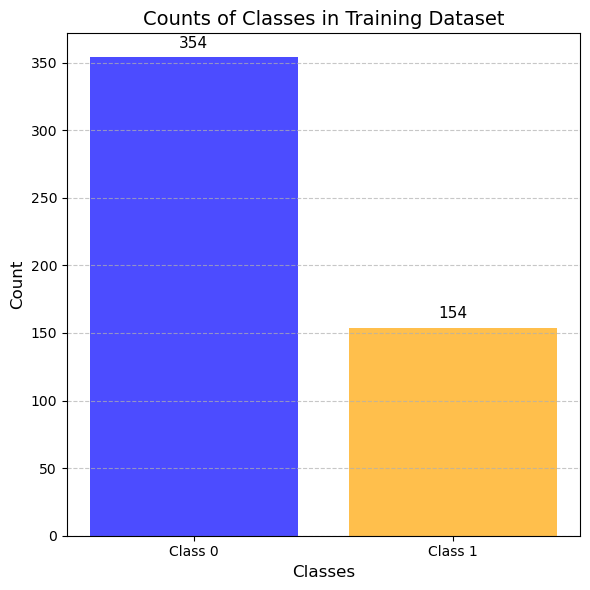

In [160]:
# Count the classes in the training dataset
Trcount0 = (y_train == 0).sum()
Trcount1 = (y_train == 1).sum()

# Prepare data for plotting
labels = ['Class 0', 'Class 1']
counts = [Trcount0, Trcount1]

# Create a bar chart
plt.figure(figsize=(6, 6))
plt.bar(labels, counts, color=['blue', 'orange'], alpha=0.7)

# Add a title and axis labels
plt.title('Counts of Classes in Training Dataset', fontsize=14)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate the bars with their respective counts
for i, count in enumerate(counts):
    plt.text(i, count + max(counts) * 0.02, str(count), ha='center', fontsize=11)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

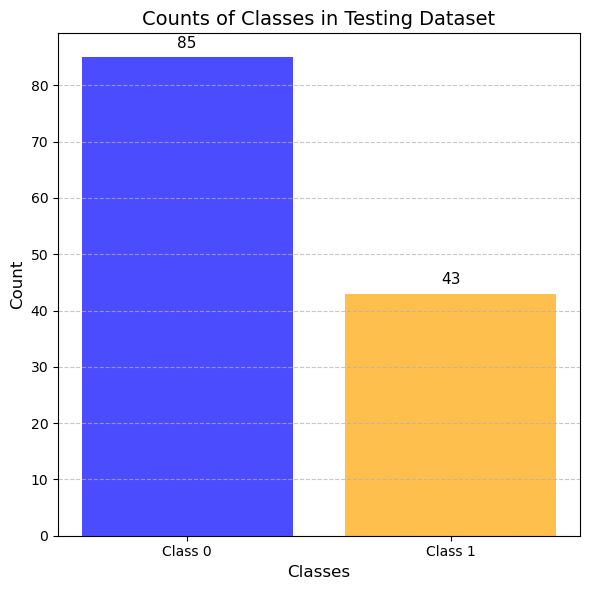

In [162]:
# Count the classes in the testing dataset
Tscount0 = (y_test == 0).sum()
Tscount1 = (y_test == 1).sum()

# Prepare data for plotting
labels = ['Class 0', 'Class 1']
counts = [Tscount0, Tscount1]

# Create a bar chart
plt.figure(figsize=(6, 6))
plt.bar(labels, counts, color=['blue', 'orange'], alpha=0.7)

# Add a title and axis labels
plt.title('Counts of Classes in Testing Dataset', fontsize=14)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate the bars with their respective counts
for i, count in enumerate(counts):
    plt.text(i, count + max(counts) * 0.02, str(count), ha='center', fontsize=11)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Applying Models

## KNeighbour

In [176]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Initialize the KNN Classifier
clf_K = KNeighborsClassifier(n_neighbors=3)

# Train the Classifier
model_K = clf_K.fit(x_train, y_train)

# Predict the response for the test dataset
y_pred_K = clf_K.predict(x_test)

# Compare predictions with actual values

y=pd.DataFrame({"Origional": y_test, "Predicted_K": y_pred_K})
y.head()

,Origional,Predicted_K
166,0,0
490,0,0
689,1,0
238,1,1
485,1,0


### KNN Model Evaluation

Confusion Matrix:
[[66 19]
 [20 23]]


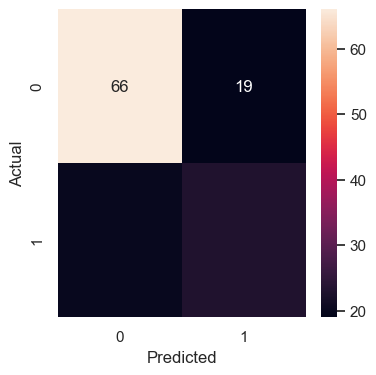

In [193]:
# calculate accuracy
from sklearn import metrics

result_K = metrics.confusion_matrix(y_test, y_pred_K)
print("Confusion Matrix:")
print(result_K)

def plt1():
    import seaborn as sns; sns.set()
    plt.figure(figsize=(4,4))
    c_mtrx_K = pd.crosstab(y_test, y_pred_K, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx_K, annot=True, fmt = '.3g')

plt1()

In [201]:
#[row, column]
#(Actual, Predict)
TP = result_K[1, 1]      
TN = result_K[0, 0]
FP = result_K[0, 1]
FN = result_K[1, 0]

def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred_K))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred_K))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred_K))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred_K))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))
    print('###########################################')

EvClsMdl(result_K)

Metrics computed from a confusion matrix
Accuracy:	 0.6953125
Sensitivity:	 0.5348837209302325
Specificity:	 0.7764705882352941
Precision:	 0.5476190476190477
Classification Eerror: 0.3046875
False_Positive_Rate: 0.22352941176470587
###########################################


## Naive Bayes

In [204]:
from sklearn.naive_bayes import GaussianNB
clf_N = GaussianNB()
# Train Classifer
model_N = clf_N.fit(x_train, y_train)
y_pred_N = clf_N.predict(x_test)
y=pd.DataFrame({"Origional": y_test, "Predicted_N": y_pred_N})
y.head()

,Origional,Predicted_N
166,0,0
490,0,0
689,1,1
238,1,1
485,1,1


### NBayes Model Evaluation

Confusion Matrix:
[[74 11]
 [17 26]]


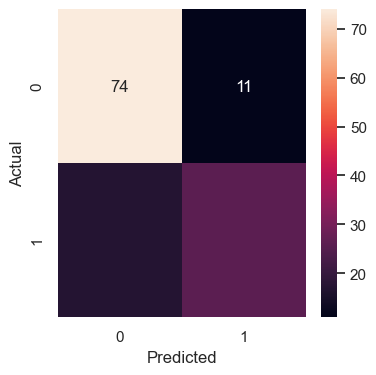

In [214]:
# calculate accuracy
from sklearn import metrics

result_N = metrics.confusion_matrix(y_test, y_pred_N)
print("Confusion Matrix:")
print(result_N)

def plt1():
    import seaborn as sns; sns.set()
    plt.figure(figsize=(4,4))
    c_mtrx_N = pd.crosstab(y_test, y_pred_N, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx_N, annot=True, fmt = '.3g')

plt1()

In [224]:
#[row, column]
#(Actual, Predict)
TP = result_N[1, 1]      
TN = result_N[0, 0]
FP = result_N[0, 1]
FN = result_N[1, 0]

def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred_N))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred_N))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred_N))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred_N))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))
    print('###########################################')
EvClsMdl(result_N)

Metrics computed from a confusion matrix
Accuracy:	 0.78125
Sensitivity:	 0.6046511627906976
Specificity:	 0.8705882352941177
Precision:	 0.7027027027027027
Classification Eerror: 0.21875
False_Positive_Rate: 0.12941176470588234
###########################################


## Decision Tree Lib Call

In [227]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
dpth=4
clf_D = DecisionTreeClassifier(criterion="entropy", max_depth=dpth)
# Train Classifer
model_D = clf_D.fit(x_train, y_train)
y_pred_D = clf_D.predict(x_test)
y=pd.DataFrame({"Origional": y_test, "Predicted_D": y_pred_D})
y.head()

,Origional,Predicted_D
166,0,0
490,0,0
689,1,1
238,1,1
485,1,0


### Decision Tree Model Evaluation

Confusion Matrix:
[[67 18]
 [10 33]]


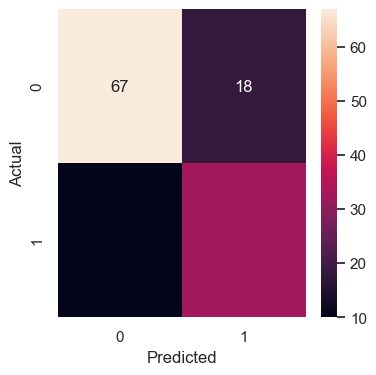

In [230]:
# calculate accuracy
from sklearn import metrics

result_D = metrics.confusion_matrix(y_test, y_pred_D)
print("Confusion Matrix:")
print(result_D)

def plt1():
    import seaborn as sns; sns.set()
    plt.figure(figsize=(4,4))
    c_mtrx_D = pd.crosstab(y_test, y_pred_D, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx_D, annot=True, fmt = '.3g')

plt1()

In [232]:
#[row, column]
#(Actual, Predict)
TP = result_D[1, 1]      
TN = result_D[0, 0]
FP = result_D[0, 1]
FN = result_D[1, 0]

def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred_D))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred_D))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred_D))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred_D))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))
    print('###########################################')
EvClsMdl(result_D)

Metrics computed from a confusion matrix
Accuracy:	 0.78125
Sensitivity:	 0.7674418604651163
Specificity:	 0.788235294117647
Precision:	 0.6470588235294118
Classification Eerror: 0.21875
False_Positive_Rate: 0.21176470588235297
###########################################


## Random Forest

In [235]:
from sklearn.ensemble import RandomForestClassifier
clf_R=RandomForestClassifier(n_estimators=3)
# Train Classifer
model_R = clf_R.fit(x_train, y_train)
y_pred_R = clf_R.predict(x_test)
y=pd.DataFrame({"Origional": y_test, "Predicted_R": y_pred_R})
y.head()

,Origional,Predicted_R
166,0,1
490,0,0
689,1,1
238,1,1
485,1,0


### Random Forest Model Evaluation

Confusion Matrix:
[[71 14]
 [17 26]]


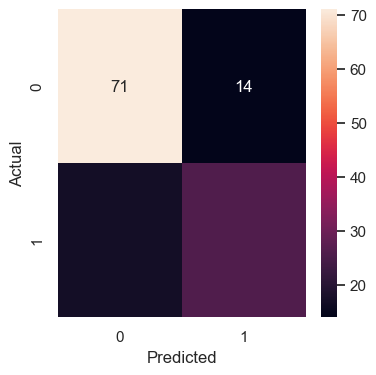

In [239]:
# calculate accuracy
from sklearn import metrics

result_R = metrics.confusion_matrix(y_test, y_pred_R)
print("Confusion Matrix:")
print(result_R)

def plt1():
    import seaborn as sns; sns.set()
    plt.figure(figsize=(4,4))
    c_mtrx_R = pd.crosstab(y_test, y_pred_R, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx_R, annot=True, fmt = '.3g')

plt1()

In [241]:
#[row, column]
#(Actual, Predict)
TP = result_R[1, 1]      
TN = result_R[0, 0]
FP = result_R[0, 1]
FN = result_R[1, 0]

def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred_R))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred_R))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred_R))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred_R))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))
    print('###########################################')
EvClsMdl(result_R)

Metrics computed from a confusion matrix
Accuracy:	 0.7578125
Sensitivity:	 0.6046511627906976
Specificity:	 0.8352941176470589
Precision:	 0.65
Classification Eerror: 0.2421875
False_Positive_Rate: 0.16470588235294115
###########################################


In [247]:
from prettytable import PrettyTable

# Assuming you have stored predicted labels in y_pred_K, y_pred_N, y_pred_D, and y_pred_R

# Create a list of model names
model_names = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest']

# Initialize PrettyTable
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Sensitivity", "Specificity", "Precision", "Classification Error", "False Positive Rate"]

# Function to add rows to the table
def add_row(model_name, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    sensitivity = metrics.recall_score(y_test, y_pred)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
    precision = metrics.precision_score(y_test, y_pred)
    classification_error = 1 - accuracy
    false_positive_rate = 1 - specificity
    
    table.add_row([model_name, round(accuracy, 3), round(sensitivity, 3), round(specificity, 3),
                   round(precision, 3), round(classification_error, 3), round(false_positive_rate, 3)])

# Add rows for each model
add_row("KNN", y_pred_K)
add_row("Naive Bayes", y_pred_N)
add_row("Decision Tree", y_pred_D)
add_row("Random Forest", y_pred_R)

# Print the table
table

Model,Accuracy,Sensitivity,Specificity,Precision,Classification Error,False Positive Rate
KNN,0.695,0.535,0.776,0.548,0.305,0.224
Naive Bayes,0.781,0.605,0.871,0.703,0.219,0.129
Decision Tree,0.781,0.767,0.788,0.647,0.219,0.212
Random Forest,0.758,0.605,0.835,0.65,0.242,0.165


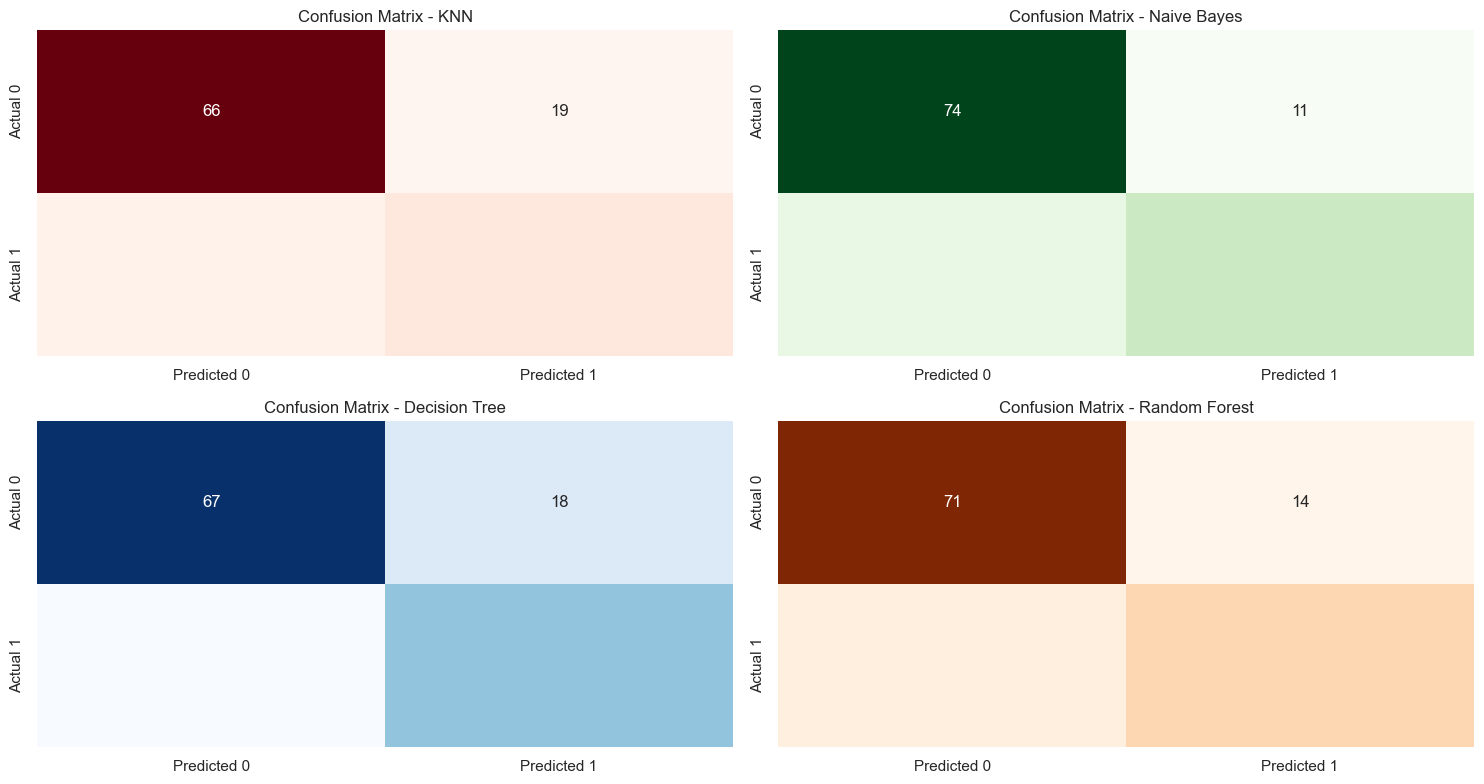

In [249]:
# Create DataFrames for confusion matrices
confusion_df_K = pd.DataFrame(result_K, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
confusion_df_N = pd.DataFrame(result_N, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
confusion_df_D = pd.DataFrame(result_D, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
confusion_df_R = pd.DataFrame(result_R, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Plot confusion matrices
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.heatmap(confusion_df_K, annot=True, fmt='.0f', cmap='Reds', cbar=False)
plt.title('Confusion Matrix - KNN')

plt.subplot(2, 2, 2)
sns.heatmap(confusion_df_N, annot=True, fmt='.0f', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')

plt.subplot(2, 2, 3)
sns.heatmap(confusion_df_D, annot=True, fmt='.0f', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')

plt.subplot(2, 2, 4)
sns.heatmap(confusion_df_R, annot=True, fmt='.0f', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix - Random Forest')

plt.tight_layout()
plt.show()

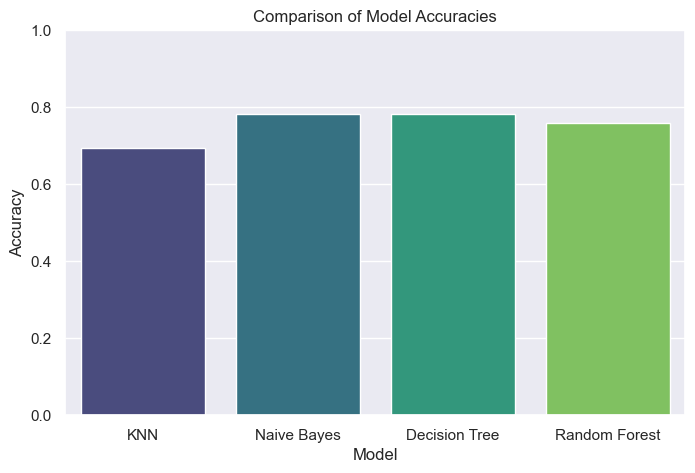

In [251]:
# Assuming you have stored accuracy scores in a list
accuracies = [
    metrics.accuracy_score(y_test, y_pred_K),
    metrics.accuracy_score(y_test, y_pred_N),
    metrics.accuracy_score(y_test, y_pred_D),
    metrics.accuracy_score(y_test, y_pred_R)
]

# Create a DataFrame for better visualization
model_names = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest']
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot the accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set the y-axis limit to ensure proper scale
plt.show()

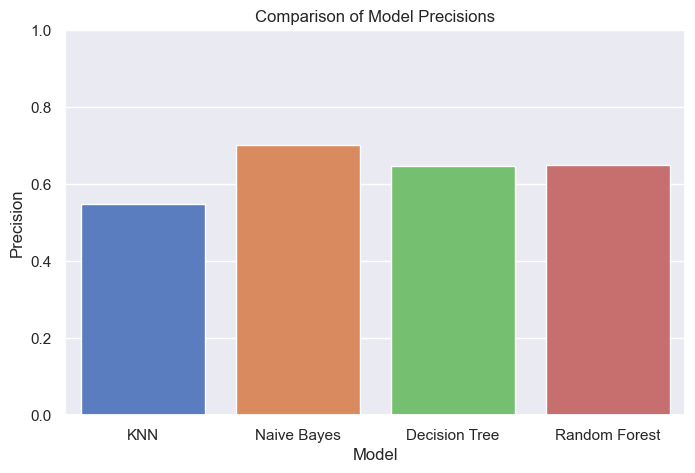

In [253]:
# Assuming you have stored precision scores in a list
precisions = [
    metrics.precision_score(y_test, y_pred_K),
    metrics.precision_score(y_test, y_pred_N),
    metrics.precision_score(y_test, y_pred_D),
    metrics.precision_score(y_test, y_pred_R)
]

# Create a DataFrame for better visualization
model_names = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest']
precision_df = pd.DataFrame({'Model': model_names, 'Precision': precisions})

# Plot the precision scores
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Precision', data=precision_df, palette='muted')
plt.title('Comparison of Model Precisions')
plt.ylim(0, 1)  # Set the y-axis limit to ensure proper scale
plt.show()

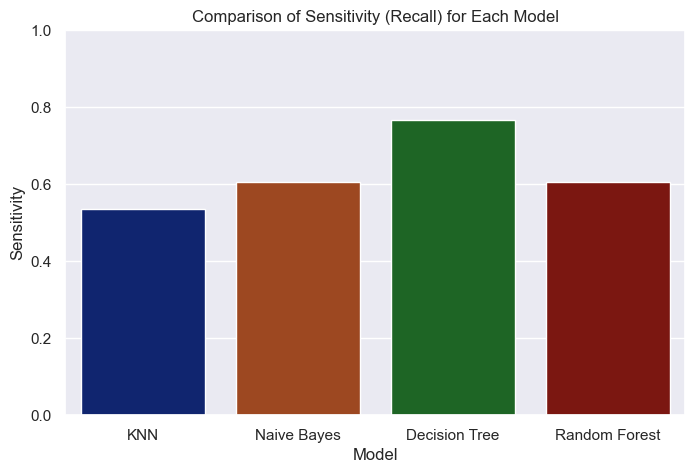

In [255]:
# Assuming you have stored sensitivity scores in a list
sensitivities = [
    metrics.recall_score(y_test, y_pred_K),
    metrics.recall_score(y_test, y_pred_N),
    metrics.recall_score(y_test, y_pred_D),
    metrics.recall_score(y_test, y_pred_R)
]

# Create a DataFrame for better visualization
model_names = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest']
sensitivity_df = pd.DataFrame({'Model': model_names, 'Sensitivity': sensitivities})

# Set a dark color palette
sns.set_palette('dark')

# Plot the sensitivity scores
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Sensitivity', data=sensitivity_df)
plt.title('Comparison of Sensitivity (Recall) for Each Model')
plt.ylim(0, 1)  # Set the y-axis limit to ensure proper scale
plt.show()

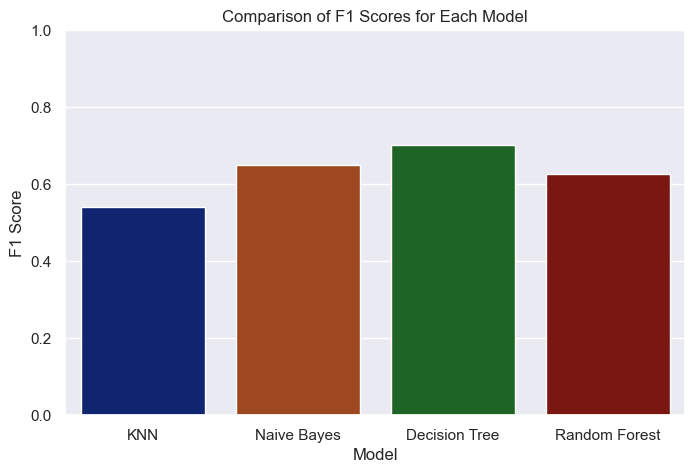

In [257]:
# Assuming you have stored F1 scores in a list
f1_scores = [
    metrics.f1_score(y_test, y_pred_K),
    metrics.f1_score(y_test, y_pred_N),
    metrics.f1_score(y_test, y_pred_D),
    metrics.f1_score(y_test, y_pred_R)
]

# Create a DataFrame for better visualization
model_names = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest']
f1_df = pd.DataFrame({'Model': model_names, 'F1 Score': f1_scores})

# Set a dark color palette
sns.set_palette('dark')

# Plot the F1 scores
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='F1 Score', data=f1_df)
plt.title('Comparison of F1 Scores for Each Model')
plt.ylim(0, 1)  # Set the y-axis limit to ensure proper scale
plt.show()